In [1]:
import json
import copy
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

from gensim.models.word2vec import Word2Vec

Using Theano backend.
WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 0: GeForce GT 720 (CNMeM is disabled, cuDNN not available)


In [2]:
import sys
sys.path.append("../../../")

from graph_dynamics.dynamics import Macrostates
from graph_dynamics.dynamics import GenerativeDynamics
from graph_dynamics.utils import graph_paths_visualization
from graph_dynamics.dynamics import GraphsFormatsHandlers
from graph_dynamics.networks.datatypes import VanillaGraph
from graph_dynamics.networks.communities import CommunityGraph

from graph_dynamics.dynamics import MacrostatesHandlers
from graph_dynamics.dynamics import Macrostates
from graph_dynamics.utils import gd_files_handler
from graph_dynamics.embeddings import alignment
from graph_dynamics.dynamics import GenerativeDynamicsCommunities
from graph_dynamics.networks import communities
from graph_dynamics.embeddings import node2vec

In [3]:
from scipy.linalg import orthogonal_procrustes
from scipy.spatial import procrustes

In [4]:
Macrostates.macrostate_function_dictionary.keys()

['advanced_stats',
 'pagerank',
 'deepwalk_online',
 'new_nodes',
 'basic_stats',
 'degree_nodes',
 'node2vec_macrostates',
 'bigclam',
 'node2vec_online_macrostates',
 'degree_centrality']

In [32]:
number_of_steps = 200
number_of_steps_in_memory = 1

forest_fire_communities_parameters = {0:{"BurnExpFireP":False,
                                         "StartNNodes":1,
                                         "ForwBurnProb":0.2,
                                         "BackBurnProb":0.32,
                                         "DecayProb":1.0,
                                         "Take2AmbasPrb":0.,
                                         "OrphanPrb": 0.},                                                                                                                                                                                                                                                                                                                                                 
                                      1:{"BurnExpFireP":False,
                                         "StartNNodes":1,
                                         "ForwBurnProb":0.2,
                                         "BackBurnProb":0.32,
                                         "DecayProb":1.0,
                                         "Take2AmbasPrb":0.,
                                         "OrphanPrb": 0.},
                                      2:{"BurnExpFireP":False,
                                         "StartNNodes":1,
                                         "ForwBurnProb":0.2,
                                         "BackBurnProb":0.32,
                                         "DecayProb":1.0,
                                         "Take2AmbasPrb":0.,
                                         "OrphanPrb": 0.},
                                      3:{"BurnExpFireP":False,
                                         "StartNNodes":1,
                                         "ForwBurnProb":0.2,
                                         "BackBurnProb":0.22,
                                         "DecayProb":1.0,
                                         "Take2AmbasPrb":0.,
                                         "OrphanPrb": 0.}}

numberOfCommunitiesAndNoise = len(forest_fire_communities_parameters.keys())

#back ground evolution
timeSeriesCommunity0 = np.ones(number_of_steps)*0
timeSeriesCommunity0[0] = 0

timeSeriesCommunity1 = np.ones(number_of_steps)*5
timeSeriesCommunity1[0] = 30

timeSeriesCommunity2 = np.ones(number_of_steps)*1
timeSeriesCommunity2[0] = 30

timeSeriesCommunity3 = np.ones(number_of_steps)*1
timeSeriesCommunity3[0] = 30

timeSeriesOfCommunities = {0:timeSeriesCommunity0,
                           1:timeSeriesCommunity1,
                           2:timeSeriesCommunity2,
                           3:timeSeriesCommunity3}

#the initial size of the community is that as defined by the time series
numberOfNodesPerCommunities = [timeSeriesOfCommunities[c][0] for c in range(1,numberOfCommunitiesAndNoise)]
numberOfBridgesPerCommunity = [2,2,2]
barabasiParameter = 3
initial_graph, subGraphs,Q,bridgesInCommunity = communities.barabasiAlbertCommunities(numberOfNodesPerCommunities, 
                                                                                      numberOfBridgesPerCommunity, 
                                                                                      barabasiParameter)
initial_communities = {c:subGraphs[c-1].nodes() for c in range(1,numberOfCommunitiesAndNoise)}
initial_communities[0]=[]


simulations_directory = "/home/cesar/Desktop/Doctorado/Projects/Networks/Dynamics/Simulations/"
dynamics_identifier = "CommunityForestFire4"
DYNAMICS_PARAMETERS = {"number_of_steps":number_of_steps,
                        "number_of_steps_in_memory":number_of_steps_in_memory,
                        "simulations_directory":simulations_directory,
                        "dynamics_identifier":dynamics_identifier,
                        "graph_class":"CommunityGraph",
                        "verbose":True,
                        "datetime_timeseries":False,
                        "initial_date":1}

DYNAMICS_PARAMETERS["macrostates"] =  [("basic_stats",())]
gd_directory = simulations_directory+dynamics_identifier+"_gd/"

community_graph = CommunityGraph(identifier_string="Communities",
                                 initial_comunities=initial_communities,
                                 networkx_graph=initial_graph)

dynamics_object = GenerativeDynamicsCommunities.CommunitiesForestFire(community_graph,
                                                                      initial_communities,
                                                                      forest_fire_communities_parameters,
                                                                      timeSeriesOfCommunities,
                                                                      DYNAMICS_PARAMETERS)

New Dynamics Directory


# Dynamics

In [33]:
dynamics_object.evolve(100,community_graph)

#100 STEPS EVOLUTION STARTED FOR CommunityForestFire4
#STARTING EVOLUTION AT STEP 0
Number of initial nodes:  90
All graph in memory
90
last guy
90
1
[   90.    97.   104.   111.   118.   125.   132.   139.   146.   153.
   160.   167.   174.   181.   188.   195.   202.   209.   216.   223.
   230.   237.   244.   251.   258.   265.   272.   279.   286.   293.
   300.   307.   314.   321.   328.   335.   342.   349.   356.   363.
   370.   377.   384.   391.   398.   405.   412.   419.   426.   433.
   440.   447.   454.   461.   468.   475.   482.   489.   496.   503.
   510.   517.   524.   531.   538.   545.   552.   559.   566.   573.
   580.   587.   594.   601.   608.   615.   622.   629.   636.   643.
   650.   657.   664.   671.   678.   685.   692.   699.   706.   713.
   720.   727.   734.   741.   748.   755.   762.   769.   776.   783.
   790.   797.   804.   811.   818.   825.   832.   839.   846.   853.
   860.   867.   874.   881.   888.   895.   902.   909.   916.   923

In [34]:
ALL_TIME_INDEXES,DYNAMICS_PARAMETERS,macroNumbers = gd_files_handler.gd_folder_stats(gd_directory,True)

Dynamics CommunityForestFire4
{u'DynamicsClassParameters': {u'CommunitiesForestFire': {u'0': {u'BackBurnProb': 0.32,
                                                                u'BurnExpFireP': False,
                                                                u'DecayProb': 1.0,
                                                                u'ForwBurnProb': 0.2,
                                                                u'OrphanPrb': 0.0,
                                                                u'StartNNodes': 1,
                                                                u'Take2AmbasPrb': 0.0},
                                                         u'1': {u'BackBurnProb': 0.32,
                                                                u'BurnExpFireP': False,
                                                                u'DecayProb': 1.0,
                                                                u'ForwBurnProb': 0.2,
                            

## Online node2vec

In [36]:
model = Word2Vec(size=2, window=10, min_count=0, sg=1, workers=8, iter=1)

nargs = {"directed":False,
         "p":0.001,
         "q":2,
         "num_walks":10,
         "walk_length":80,
         "weighted":False,
         "undirected":True,
         "model": model}

nx_G = nx.read_edgelist(gd_directory + DYNAMICS_PARAMETERS['dynamics_identifier'] +'_gGD_0_.gd')
G = node2vec.Graph(nx_G,
                   nargs["directed"],
                   nargs["p"],
                   nargs["q"])
G.preprocess_transition_probs()

walks = G.simulate_walks(nargs["num_walks"],
                         nargs["walk_length"])
walks = [map(str, walk) for walk in walks]

model.build_vocab([map(str, nx_G.nodes())])
model.train(walks, total_examples=model.corpus_count, epochs=model.iter)

Walk iteration:
1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10
10 / 10


28040

In [37]:
macrostates_run_ideintifier = "node2vec_online" 
macrostates_names  = [("node2vec_online_macrostates",(nargs,))]

window = 1
rolling = True
Macrostates.evaluate_vanilla_macrostates_window(gd_directory,
                                                macrostates_names, 
                                                macrostates_run_ideintifier, 
                                                window, 
                                                rolling)

Walk iteration:
1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10
10 / 10
Evaluating Time 1 for node2vec_online
Walk iteration:
1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10
10 / 10
Evaluating Time 2 for node2vec_online
Walk iteration:
1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10
10 / 10
Evaluating Time 3 for node2vec_online
Walk iteration:
1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10
10 / 10
Evaluating Time 4 for node2vec_online
Walk iteration:
1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10
10 / 10
Evaluating Time 5 for node2vec_online
Walk iteration:
1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10
10 / 10
Evaluating Time 6 for node2vec_online
Walk iteration:
1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10
10 / 10
Evaluating Time 7 for node2vec_online
Walk iteration:
1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10
10 / 10
Evaluating Time 8 for node2vec_online


# READ ALL ALIGNEMENTS

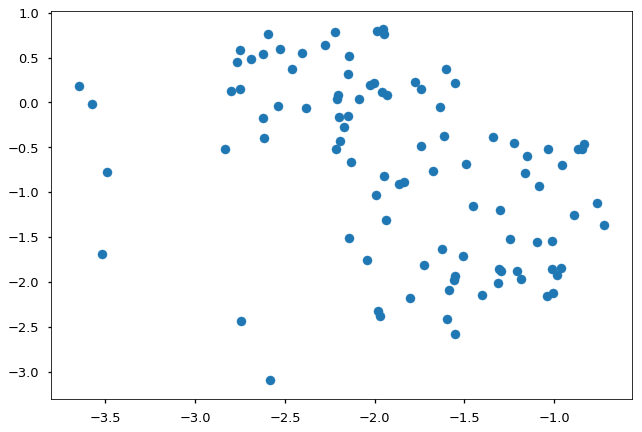

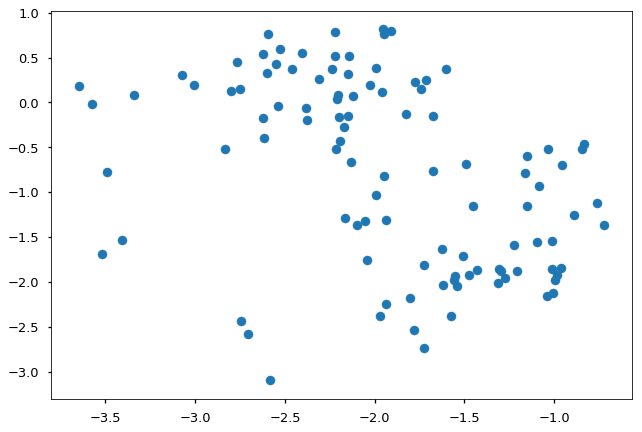

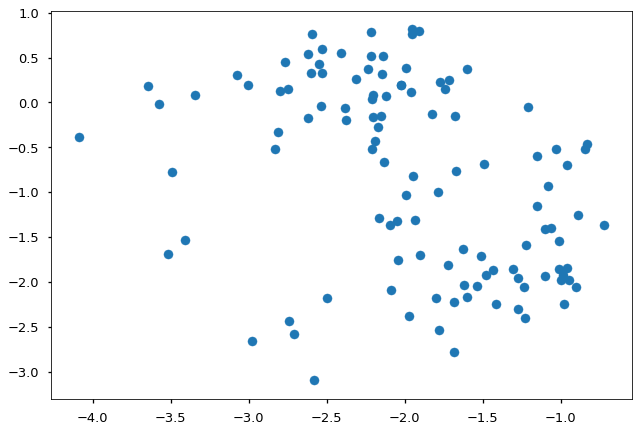

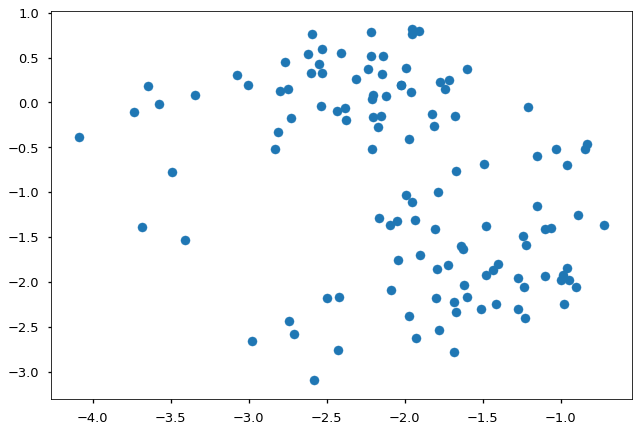

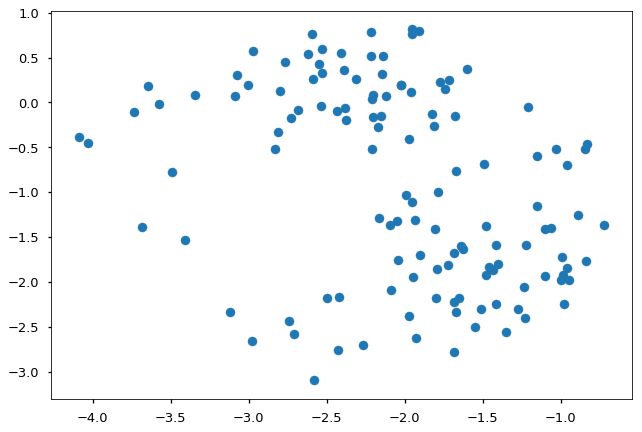

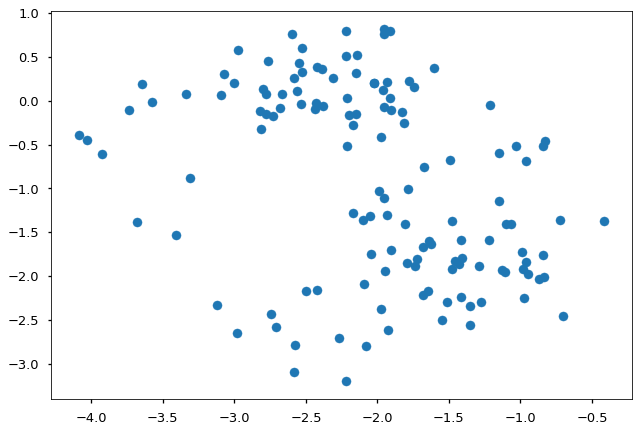

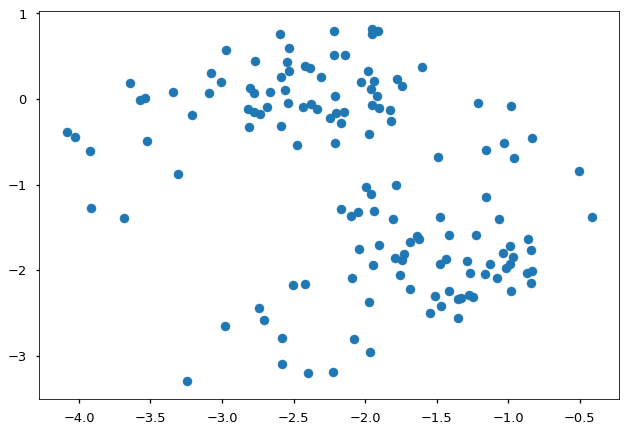

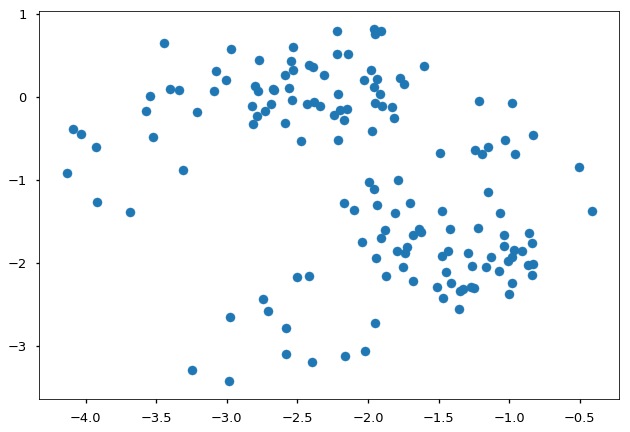

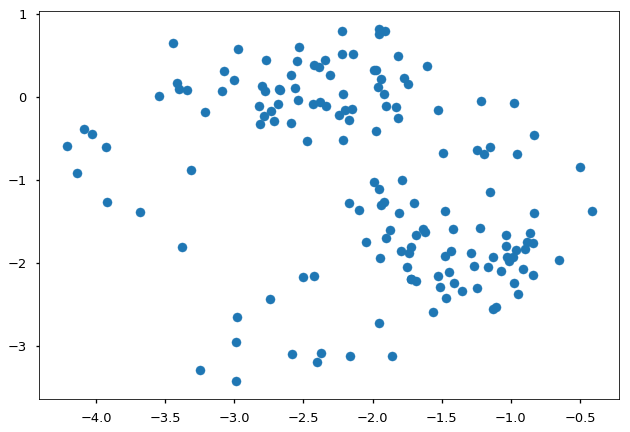

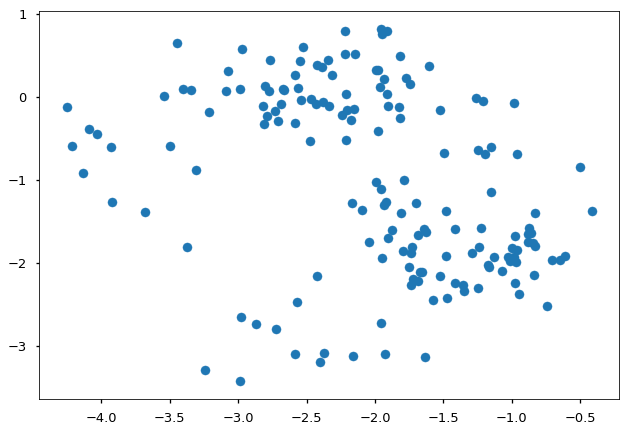

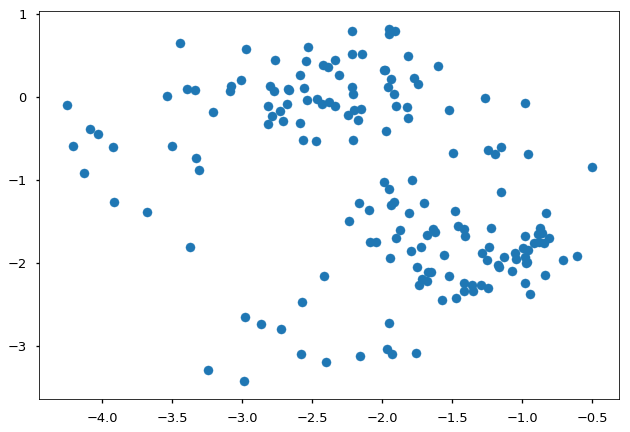

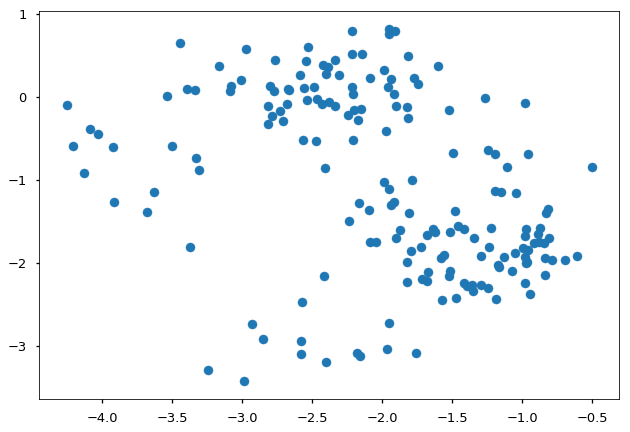

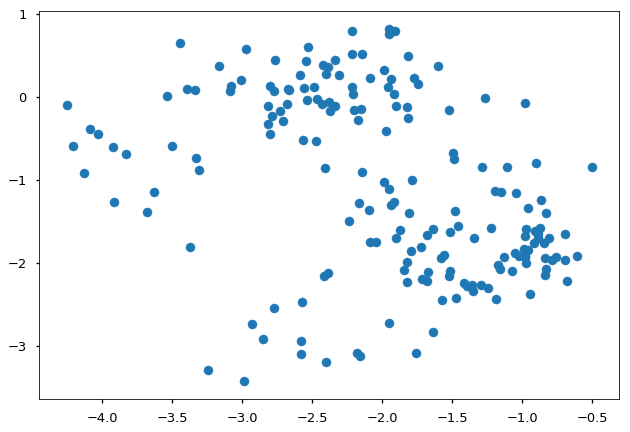

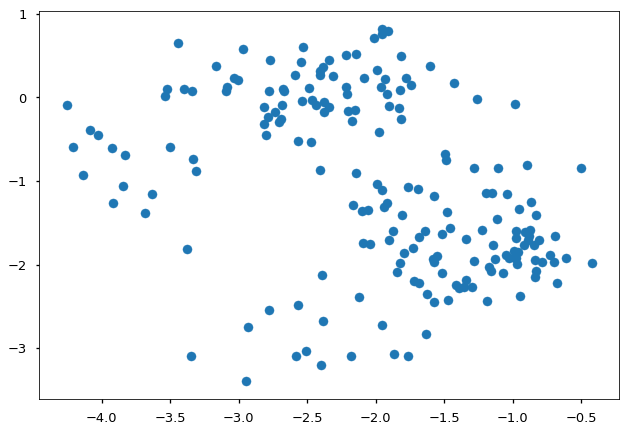

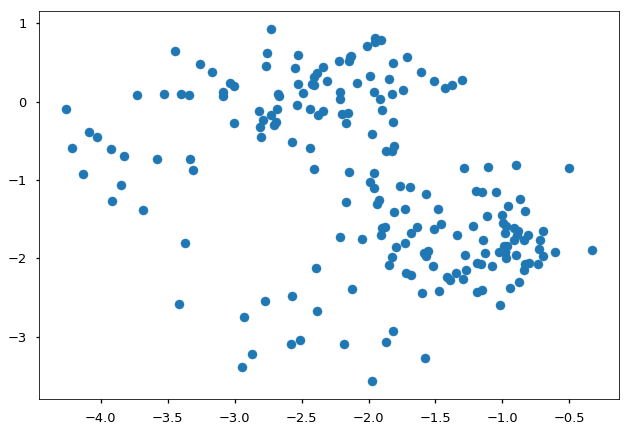

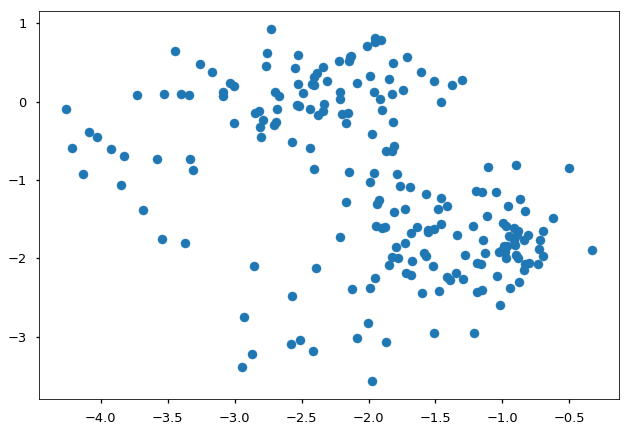

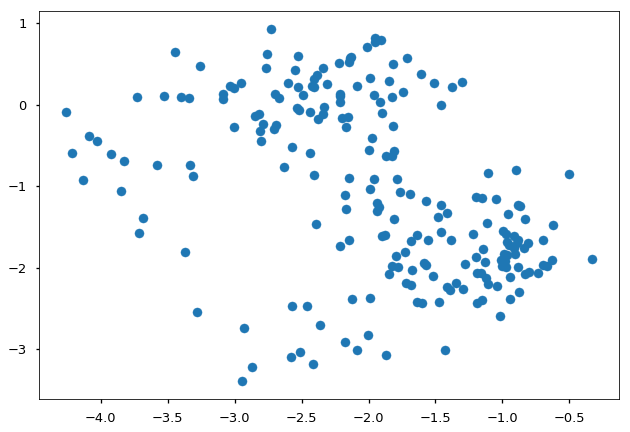

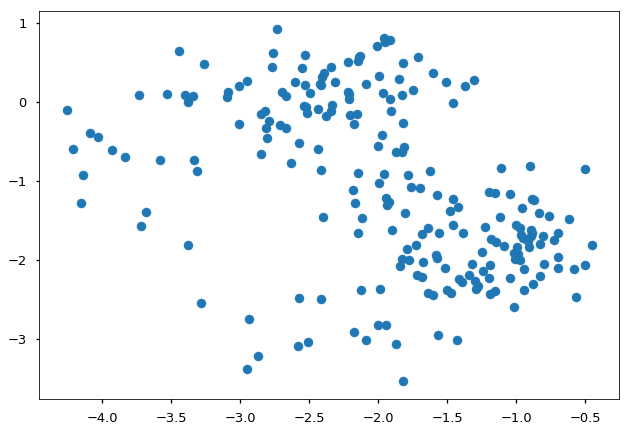

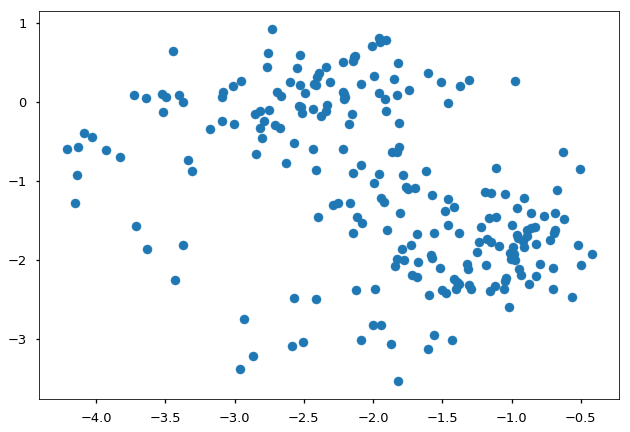

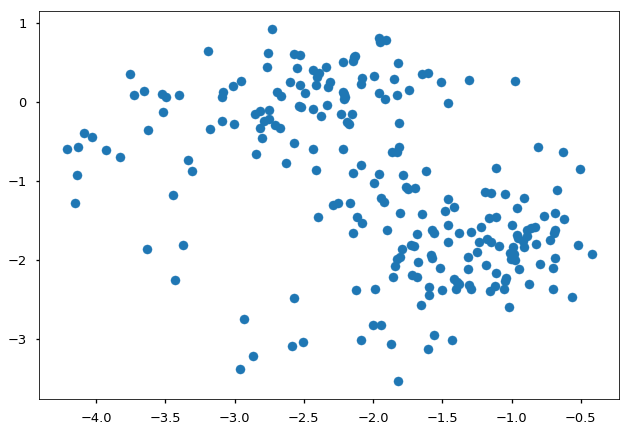

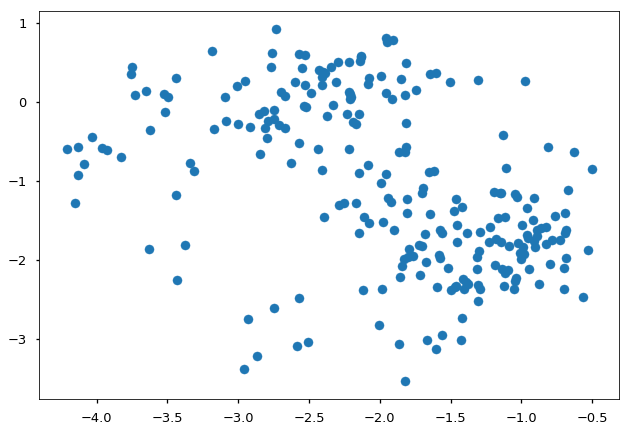

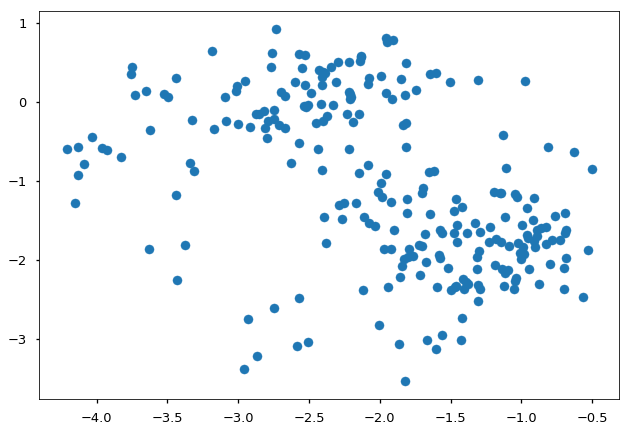

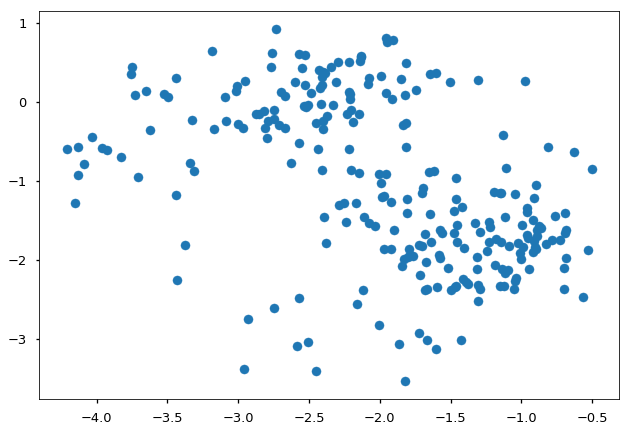

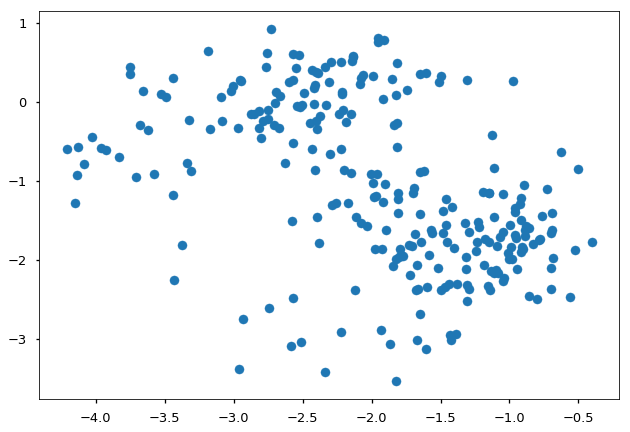

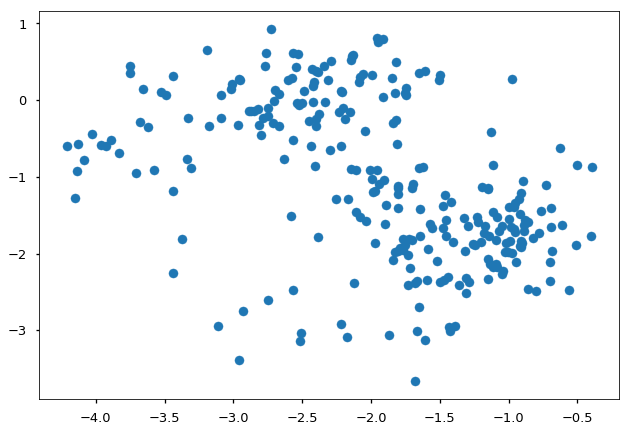

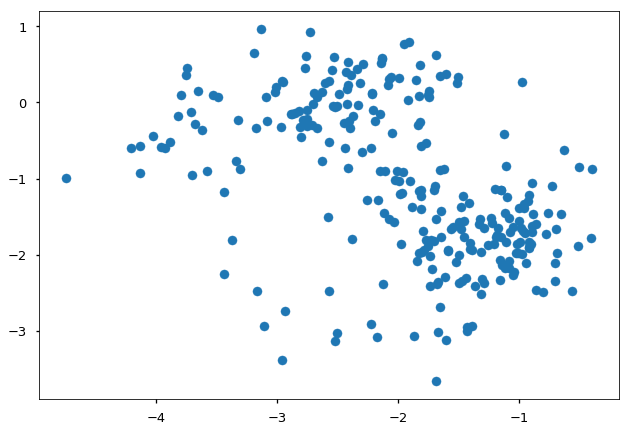

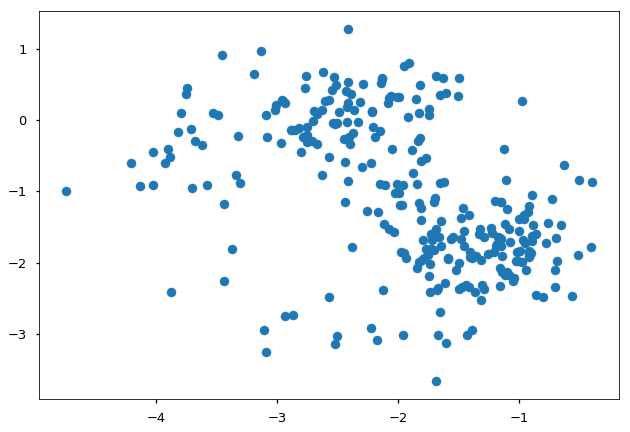

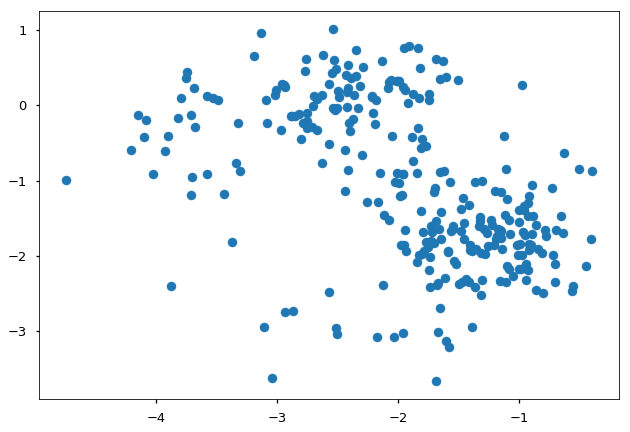

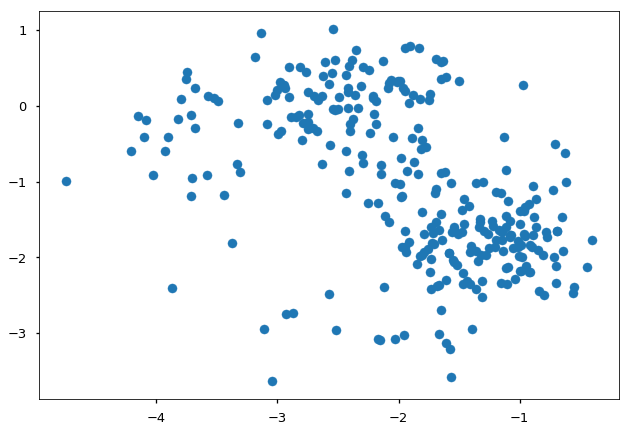

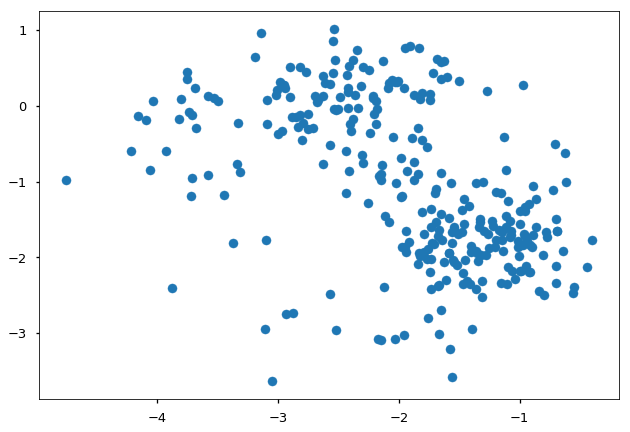

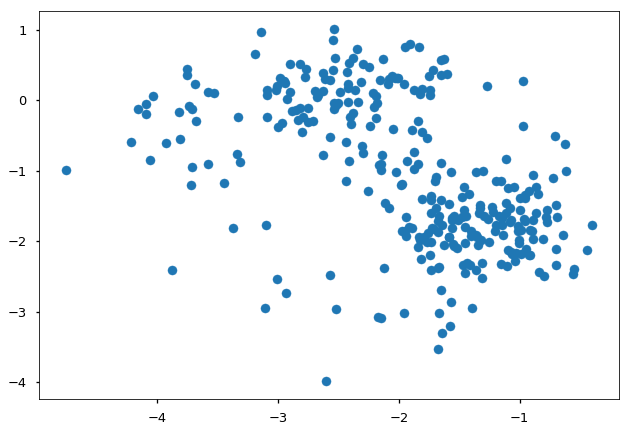

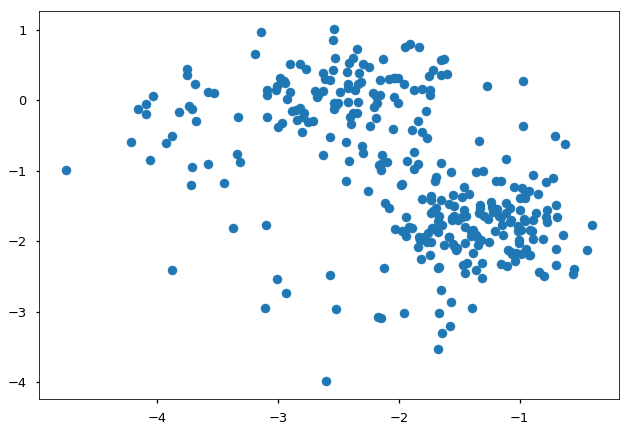

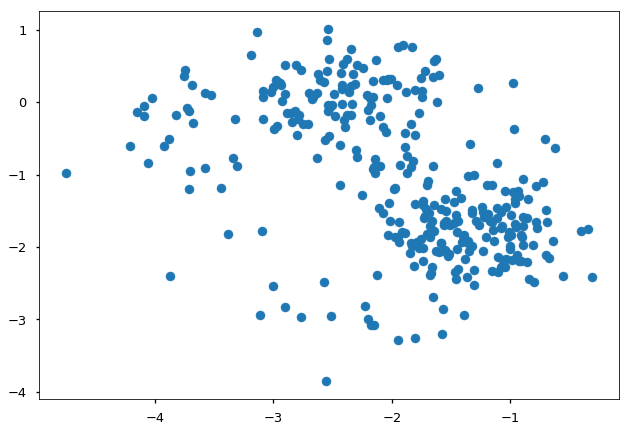

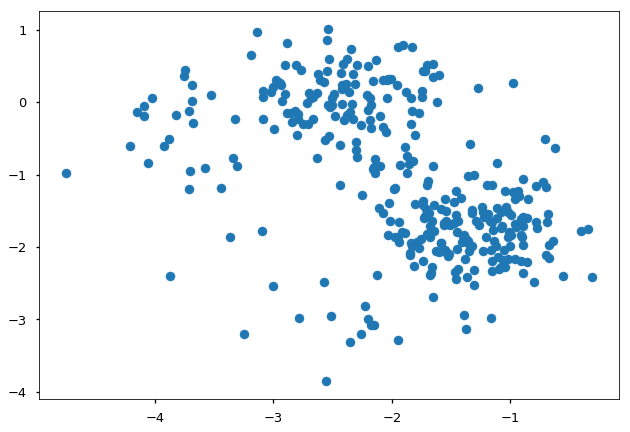

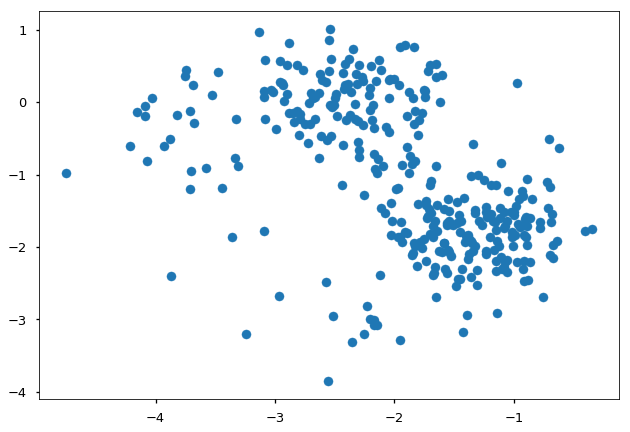

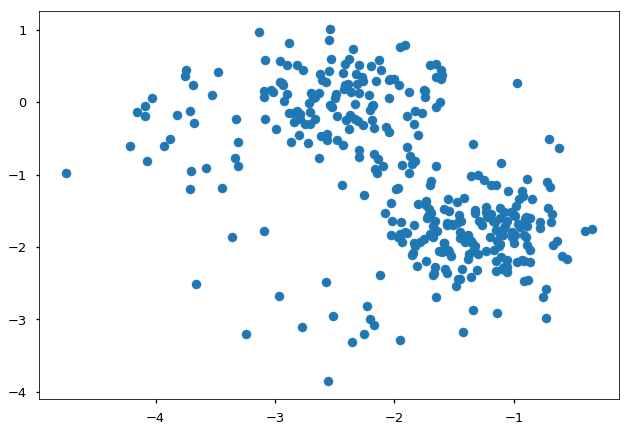

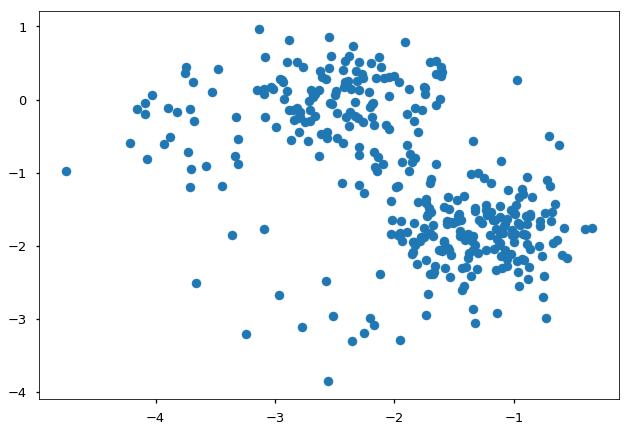

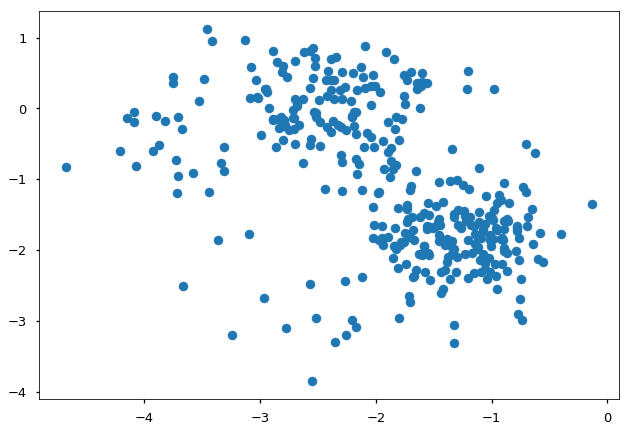

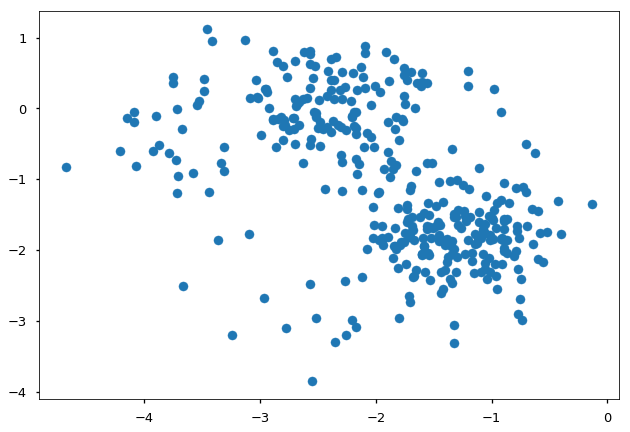

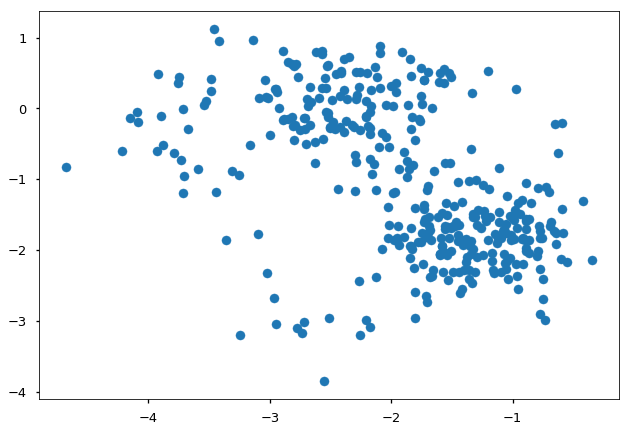

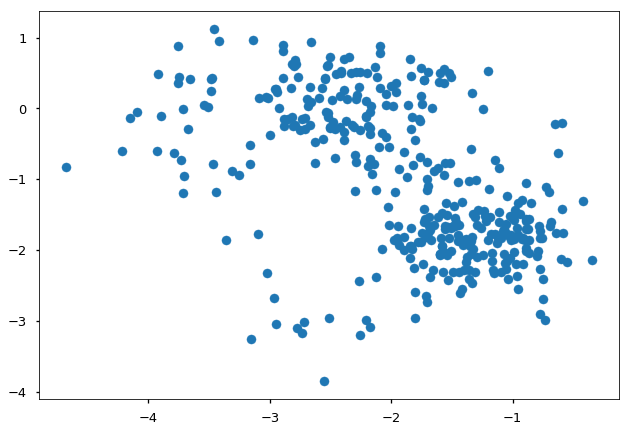

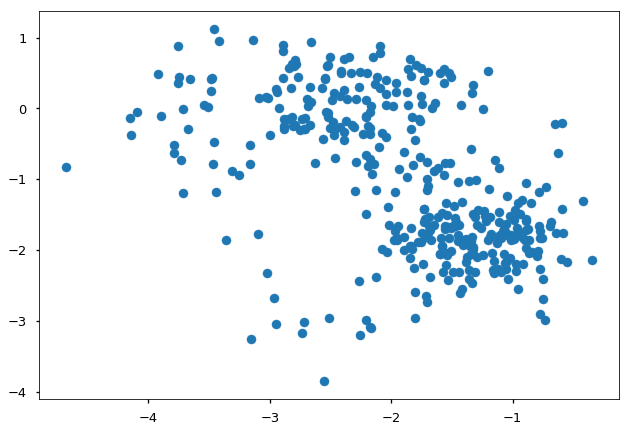

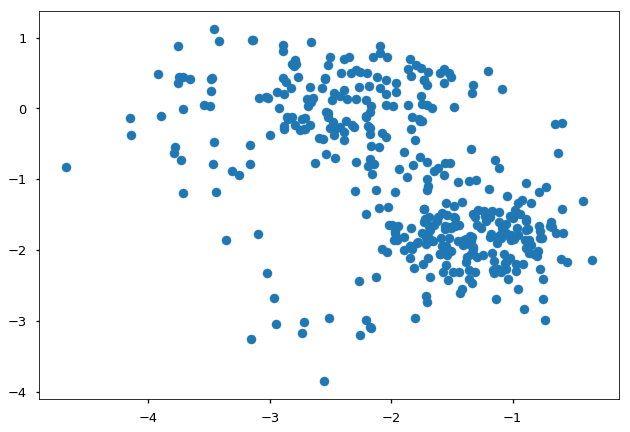

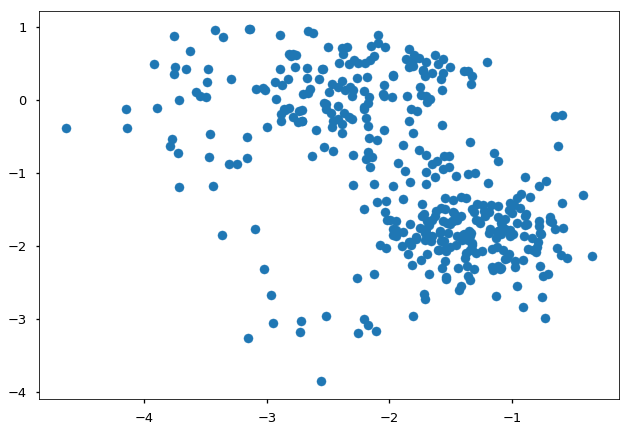

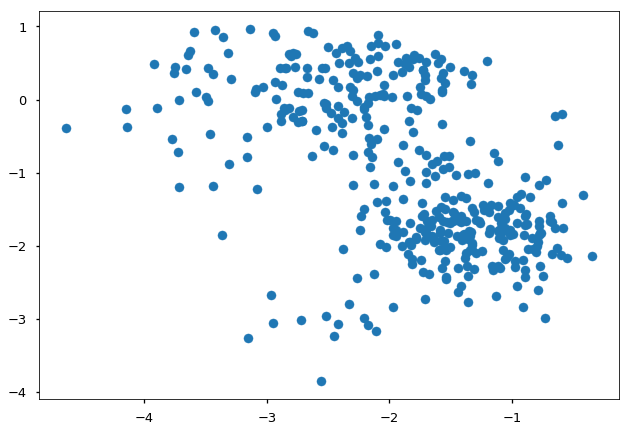

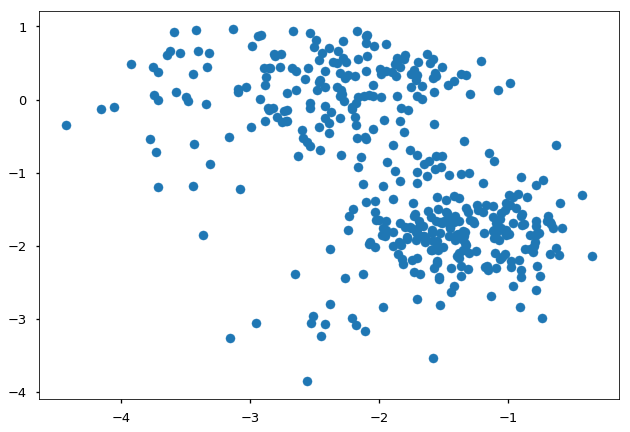

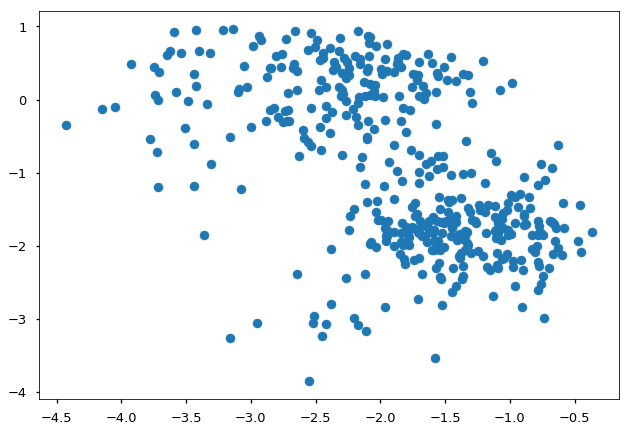

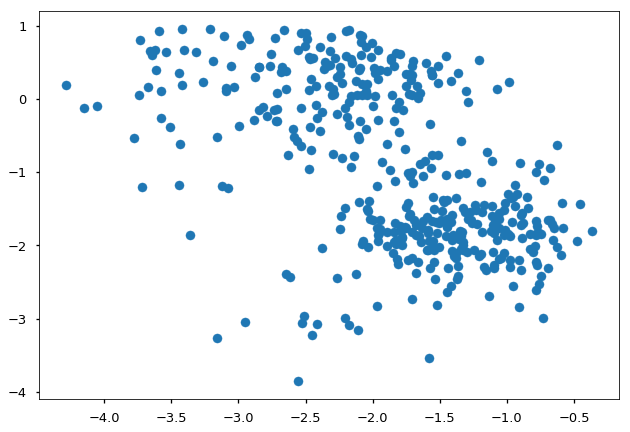

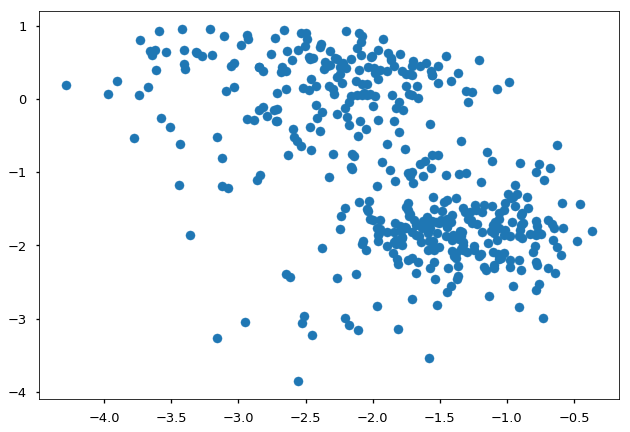

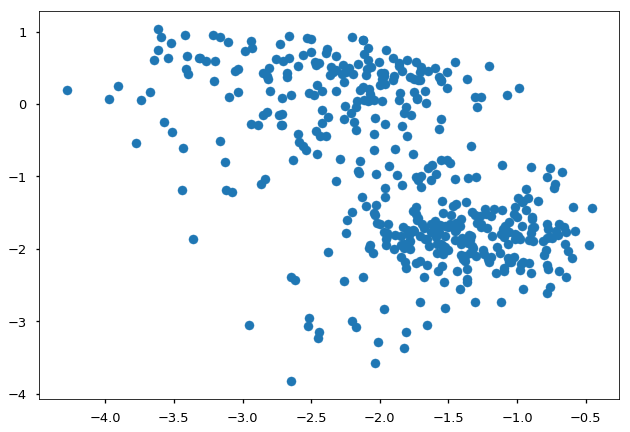

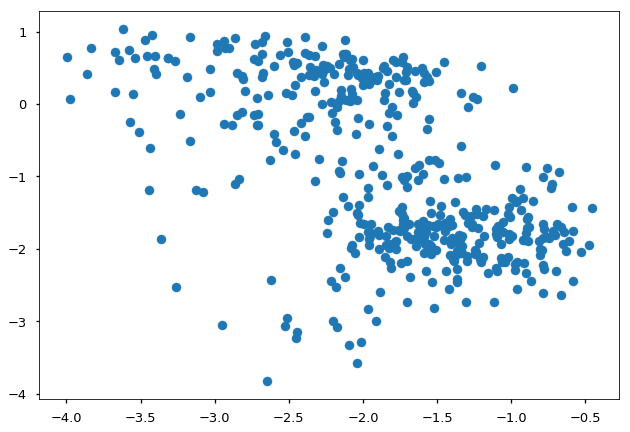

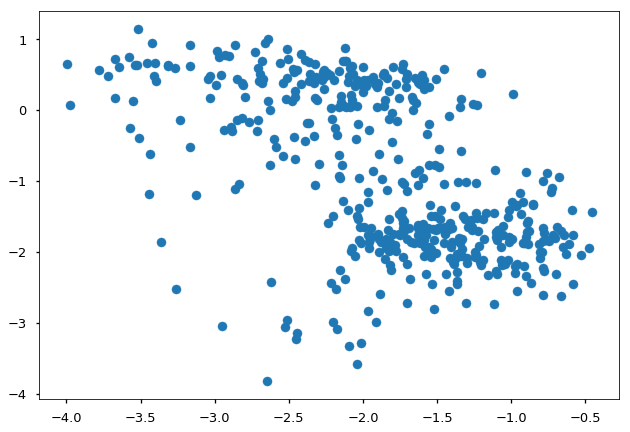

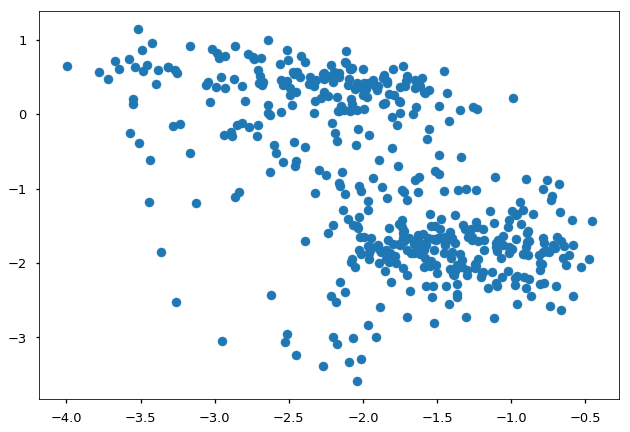

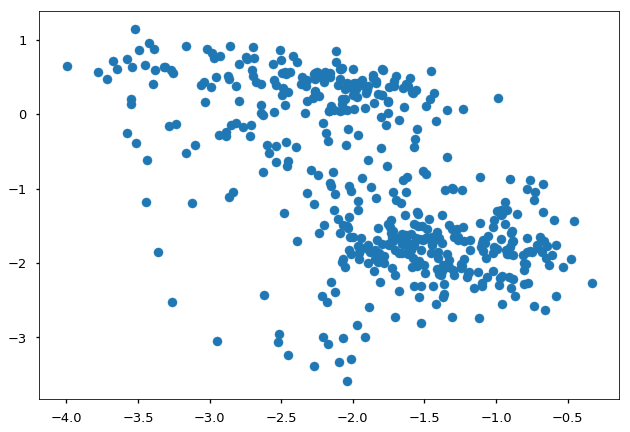

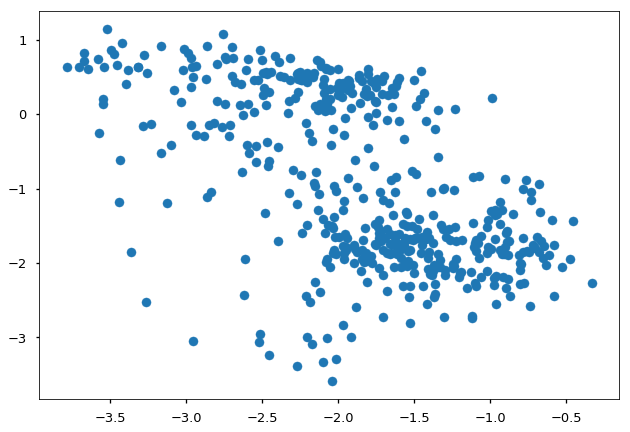

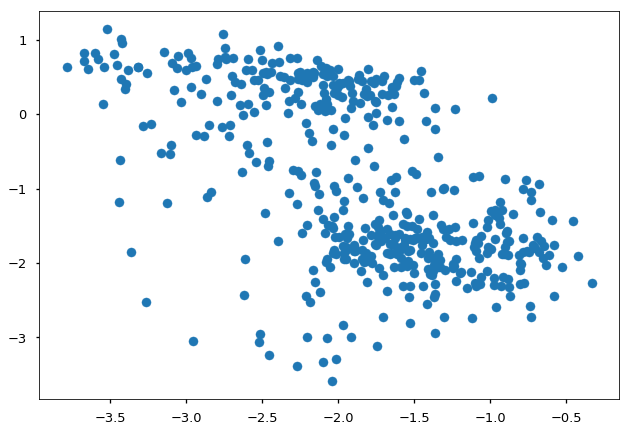

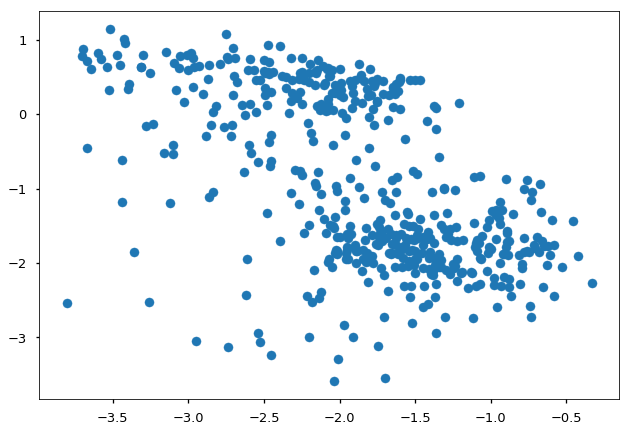

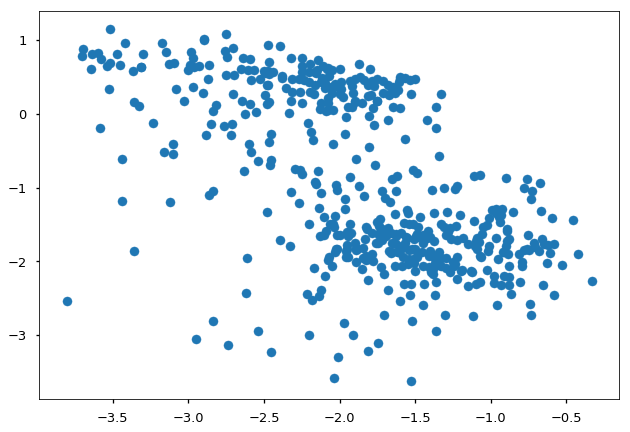

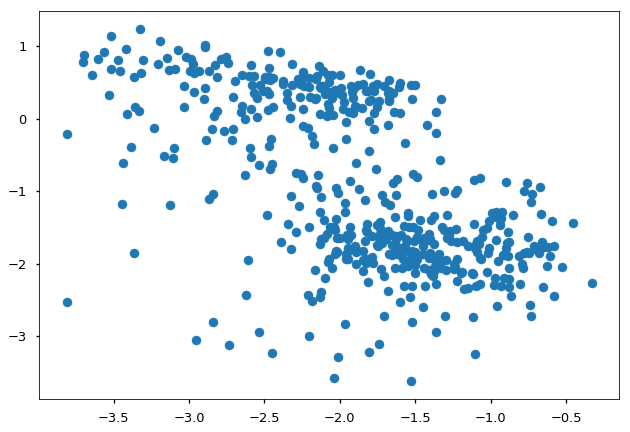

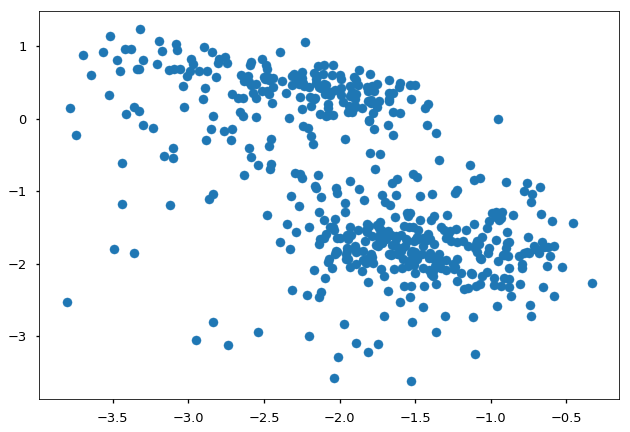

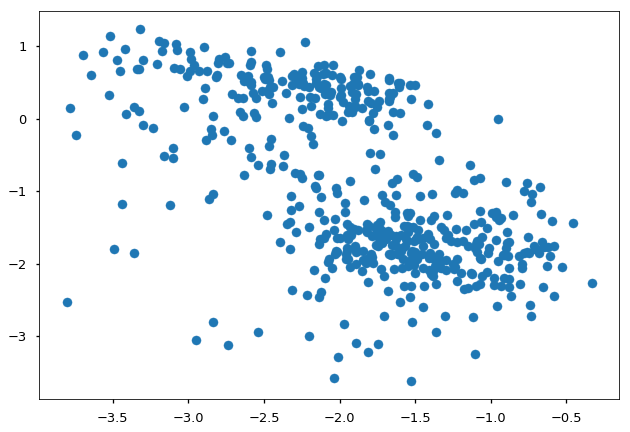

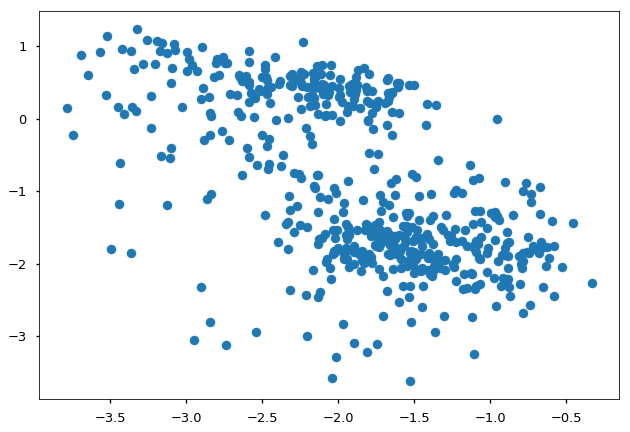

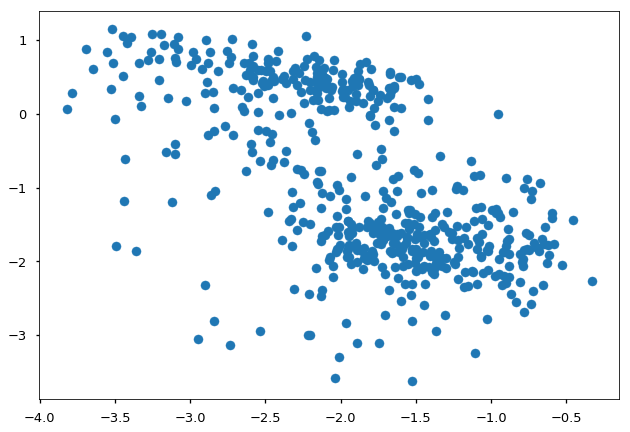

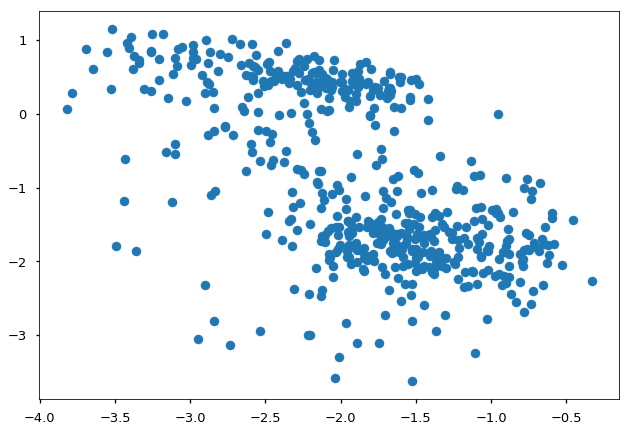

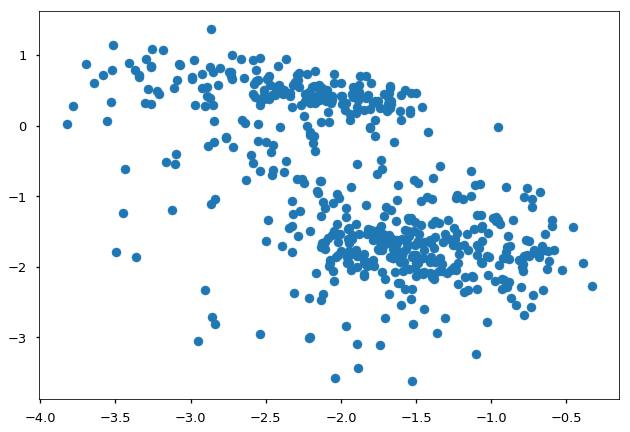

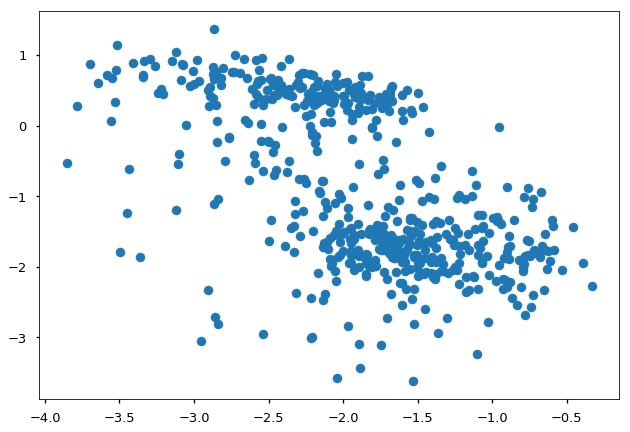

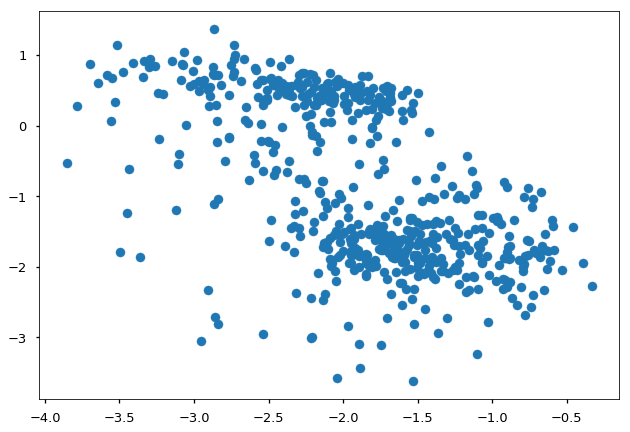

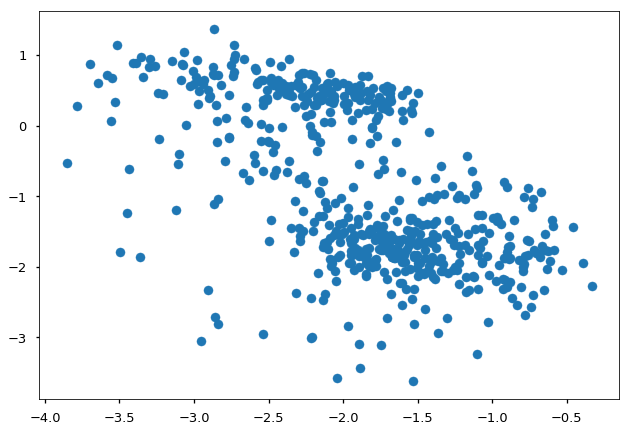

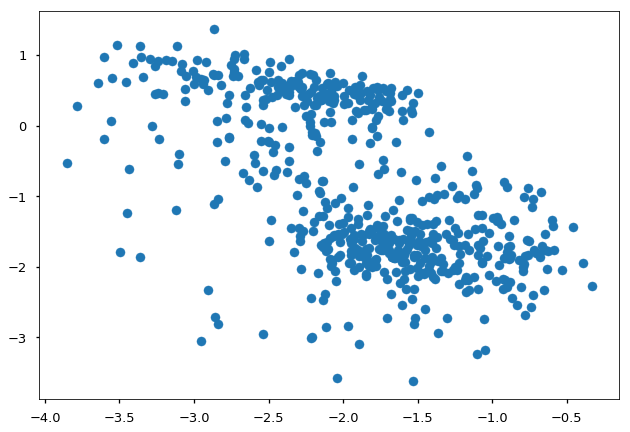

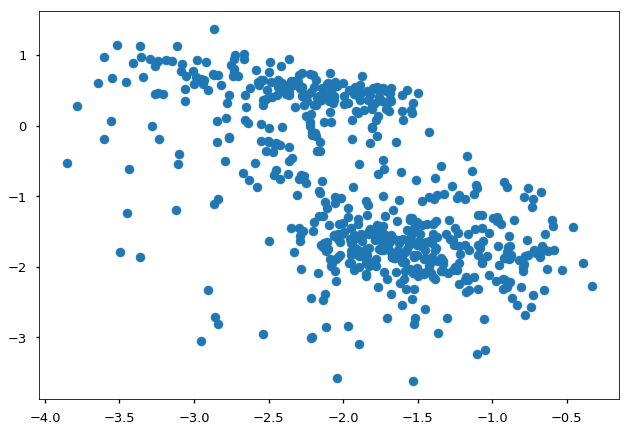

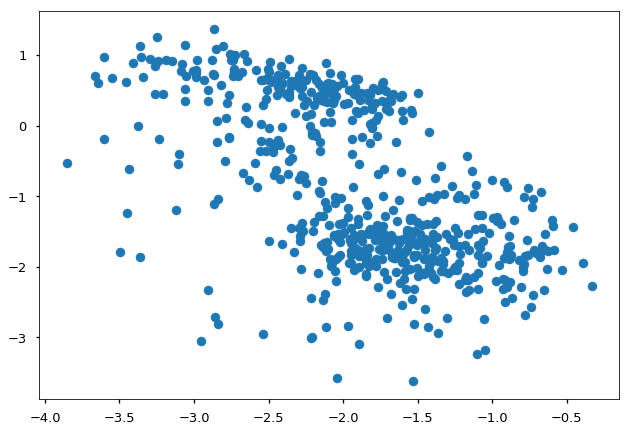

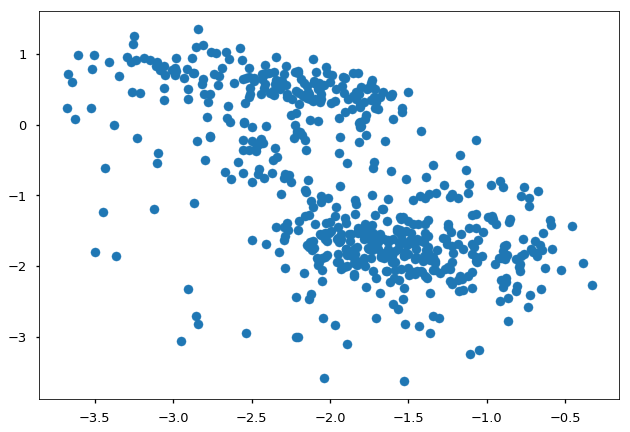

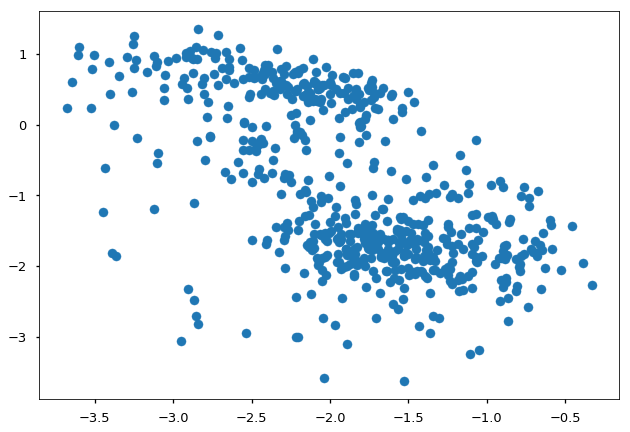

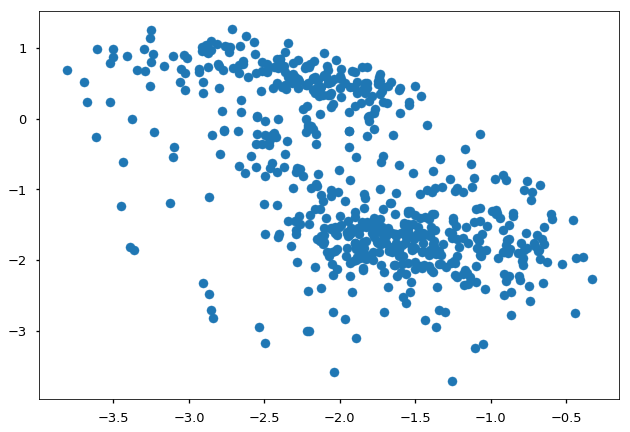

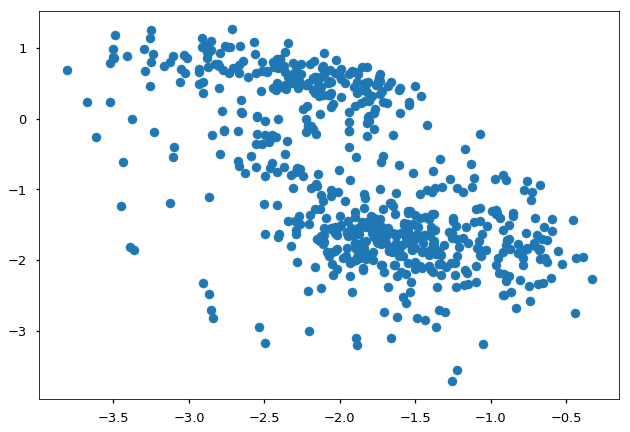

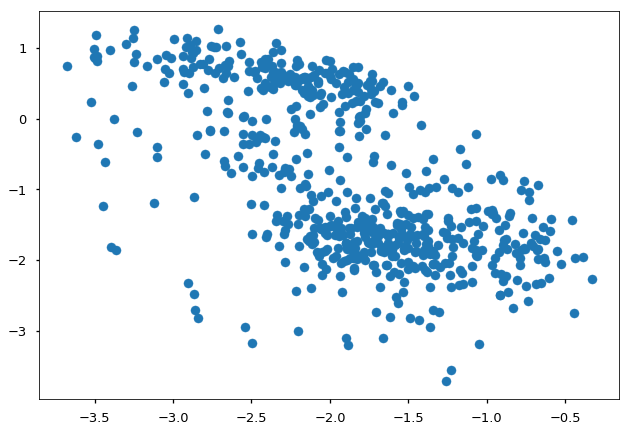

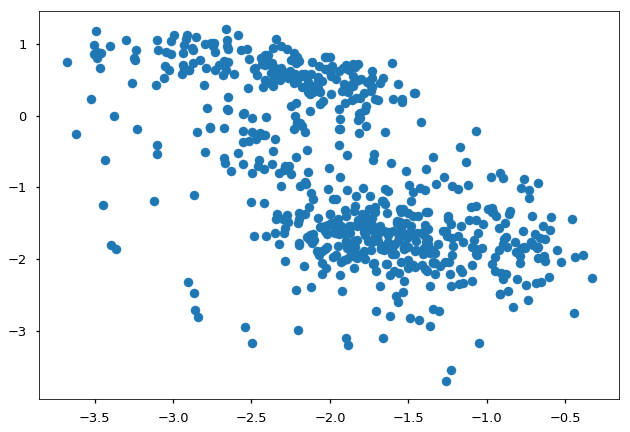

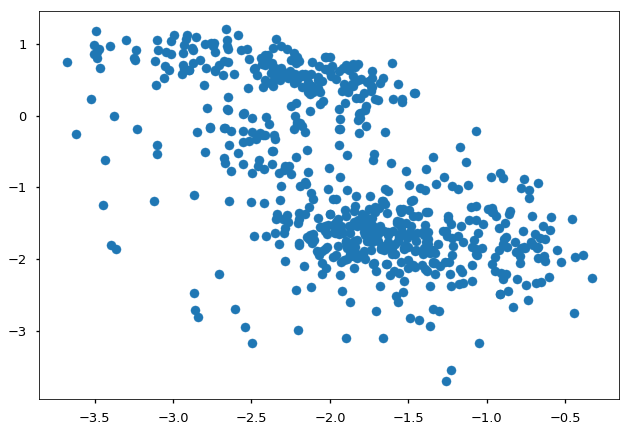

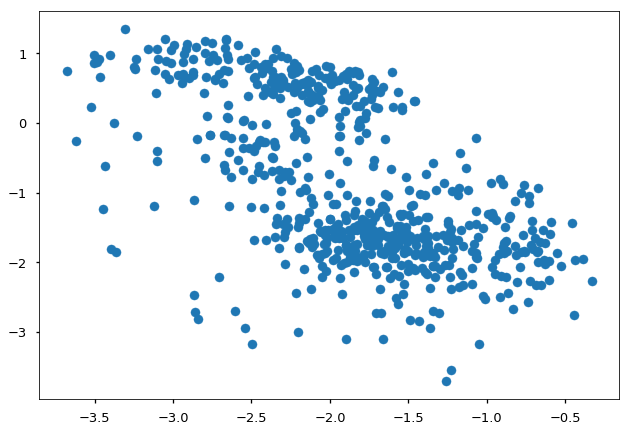

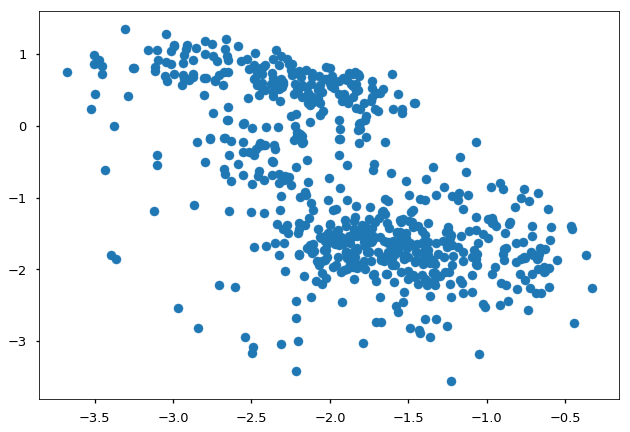

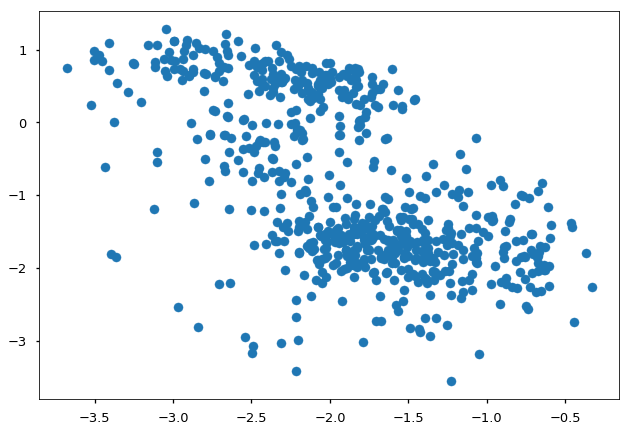

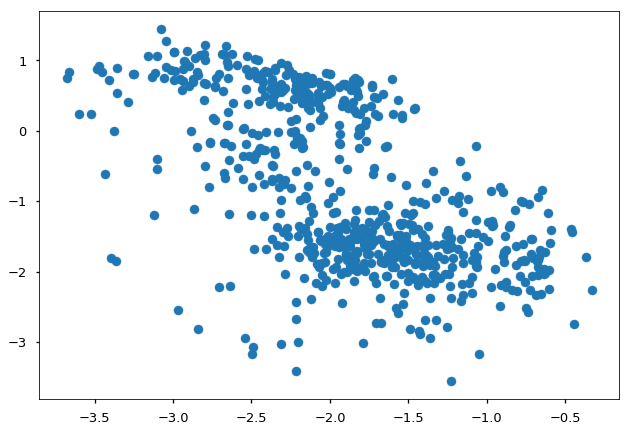

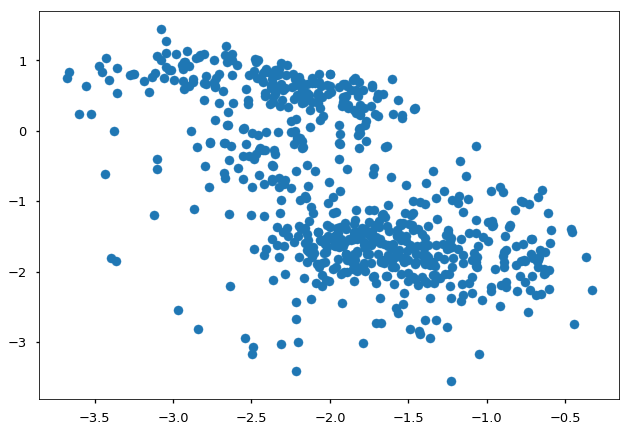

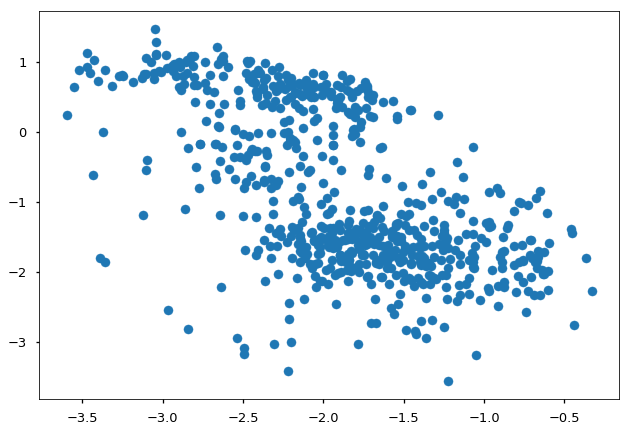

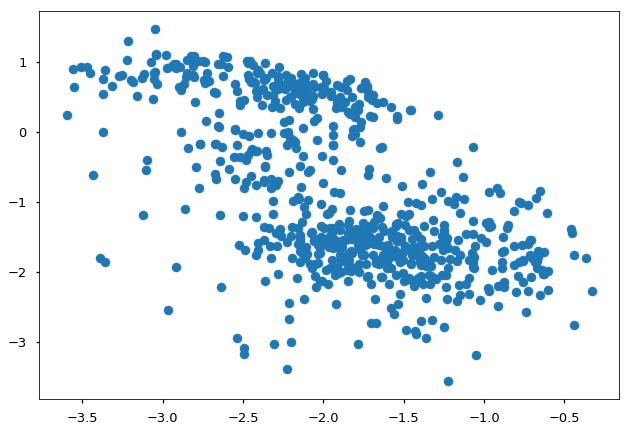

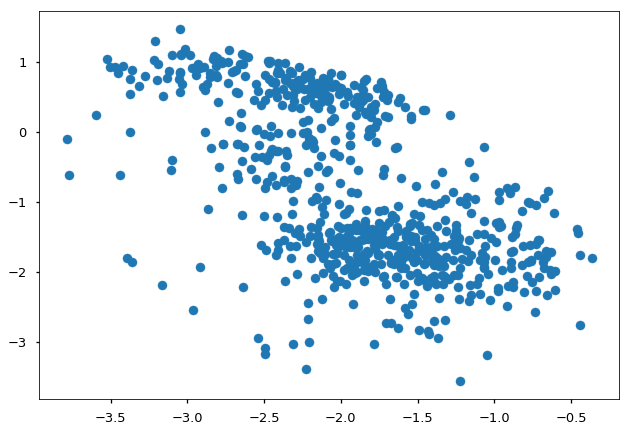

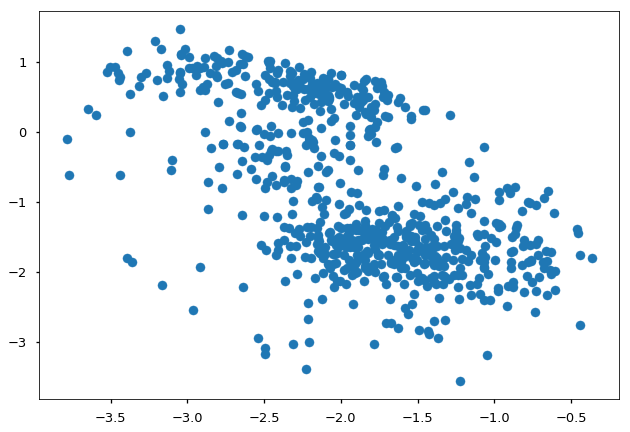

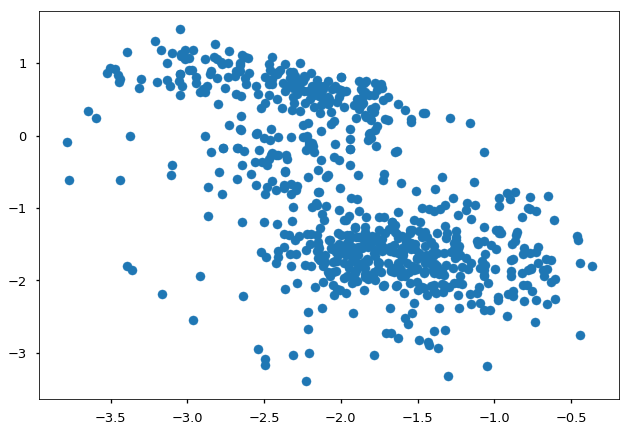

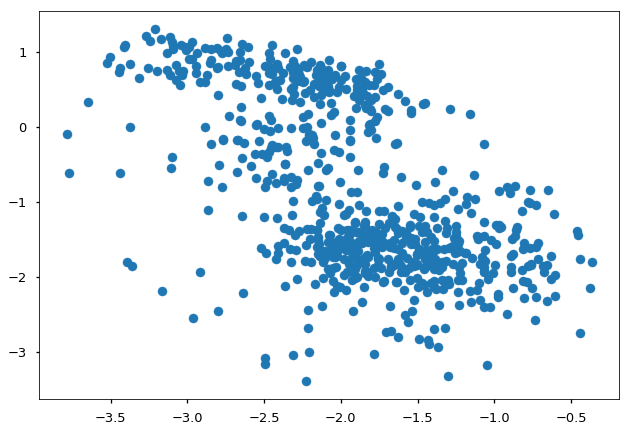

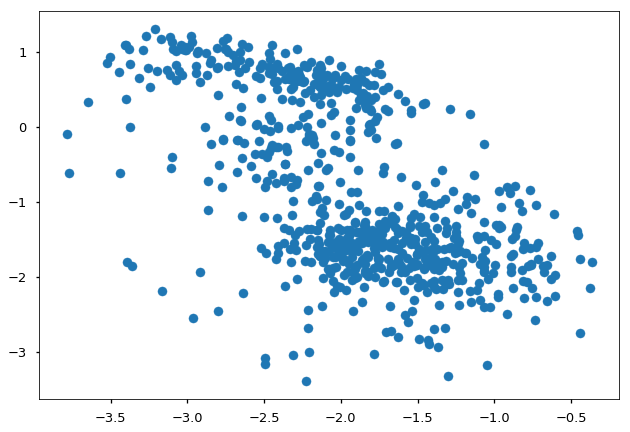

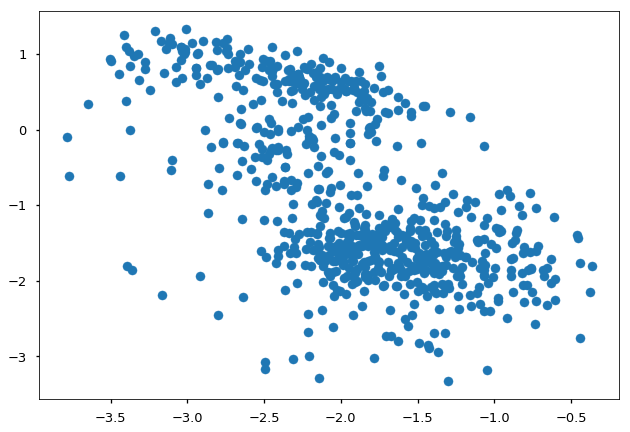

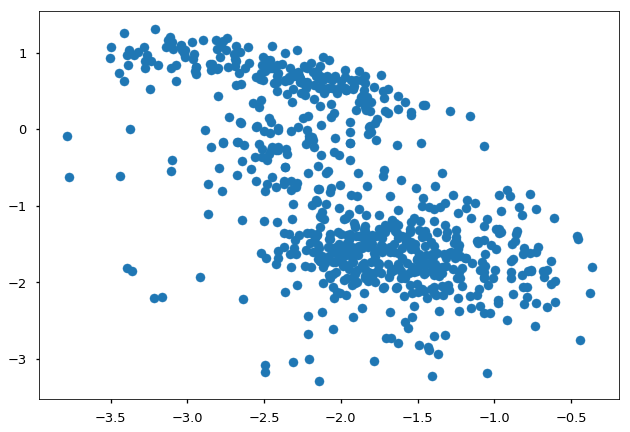

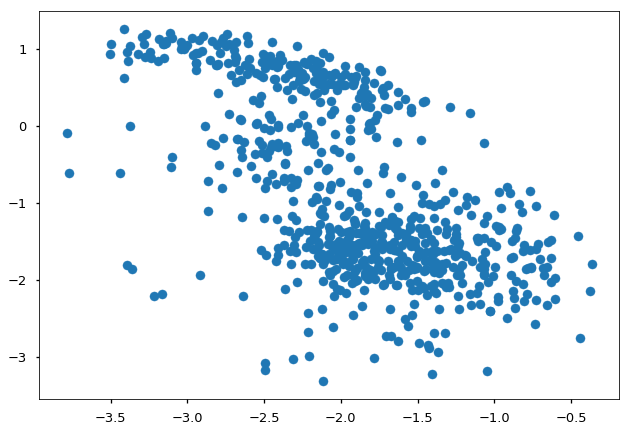

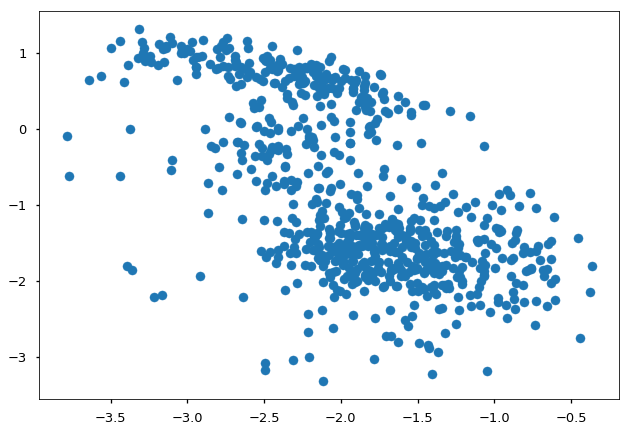

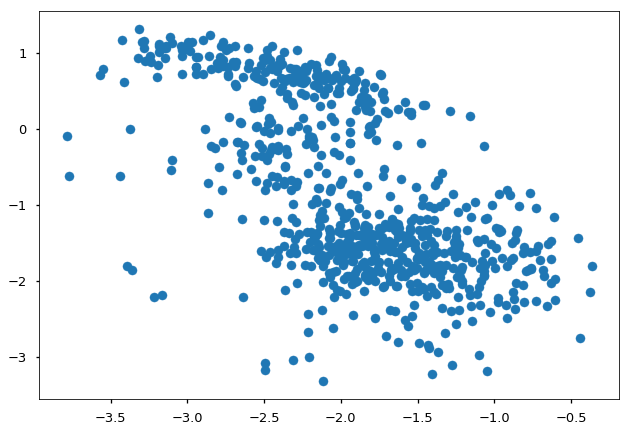

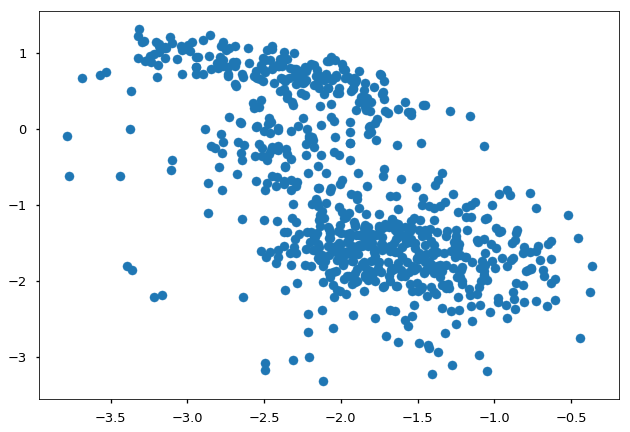

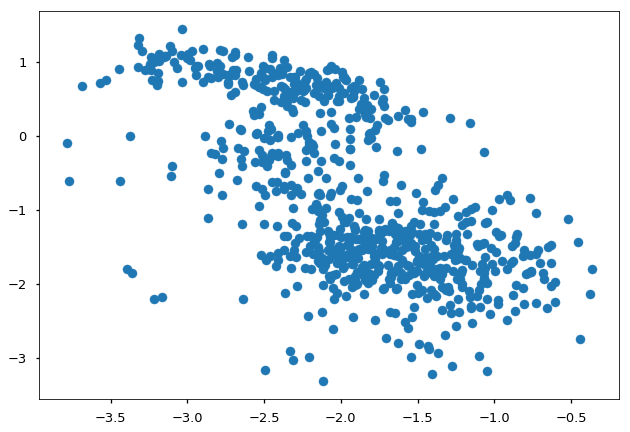

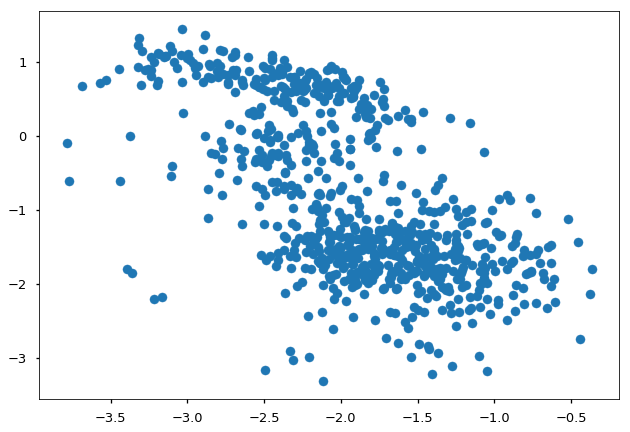

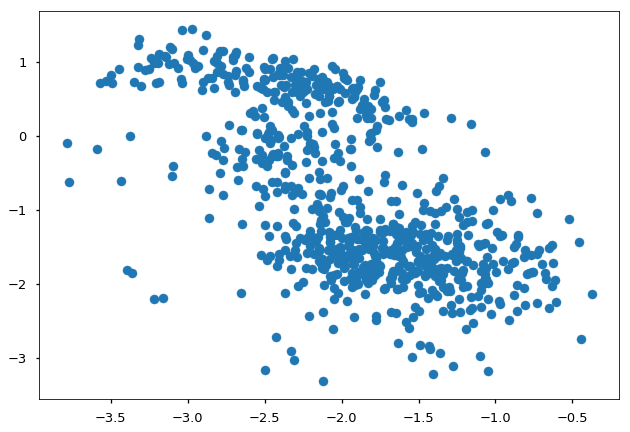

IOError: [Errno 2] No such file or directory: u'/home/cesar/Desktop/Doctorado/Projects/Networks/Dynamics/Simulations/CommunityForestFire4_gd/CommunityForestFire4_mGD_node2vec_online_100_.gd'

In [38]:
for i in range(1,number_of_steps):
    node_embedding = MacrostatesHandlers.time_index_macro(gd_directory,
                                         "node2vec_online_macrostates",
                                         "node2vec_online",
                                         i)
    w = np.array(node_embedding.values())
    plt.scatter(w[:,0], w[:,1],label="{0}".format(i))
    plt.show()